In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from scipy.integrate import solve_ivp


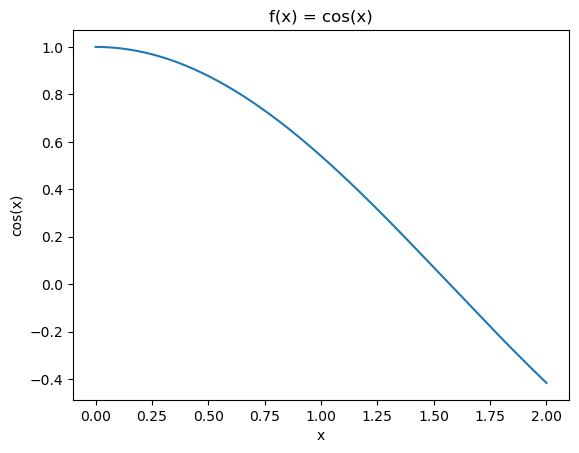

In [2]:
x = np.linspace(0,2,1000)
y = np.cos(x)
plt.title("f(x) = cos(x)")
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.plot(x,y)

In [3]:
def scientific_format(x):
    if pd.isna(x) or x == 0:
        return str(x)
    
    exponent = int(np.floor(np.log10(abs(x))))
    
    coefficient = x / (10 ** exponent)
    
    if coefficient == int(coefficient):
        formatted_coefficient = f"{int(coefficient)}."
    else:
        formatted_coefficient = f"{coefficient:.2f}"
    
    return f"{formatted_coefficient} x 10^{exponent}"

+--------+--------------+---------------------------+--------------+---------------+
|   N    |      h       |  err(N) = |x_N - cos(2)|  |    errmax    |     P_Num     |
+========+==============+===========================+==============+===============+
|   10   |  2. x 10^-1  |       9.19 x 10^-4        | 3.76 x 10^-2 |      nan      |
+--------+--------------+---------------------------+--------------+---------------+
|   20   |  1. x 10^-1  |       4.52 x 10^-6        | 1.79 x 10^-2 |  7.67 x 10^0  |
+--------+--------------+---------------------------+--------------+---------------+
|   40   |  5. x 10^-2  |       1.06 x 10^-4        | 8.73 x 10^-3 | -4.55 x 10^0  |
+--------+--------------+---------------------------+--------------+---------------+
|   80   | 2.50 x 10^-2 |       7.73 x 10^-5        | 4.32 x 10^-3 | 4.51 x 10^-1  |
+--------+--------------+---------------------------+--------------+---------------+
|  160   | 1.25 x 10^-2 |       4.46 x 10^-5        | 2.15 x 10^-

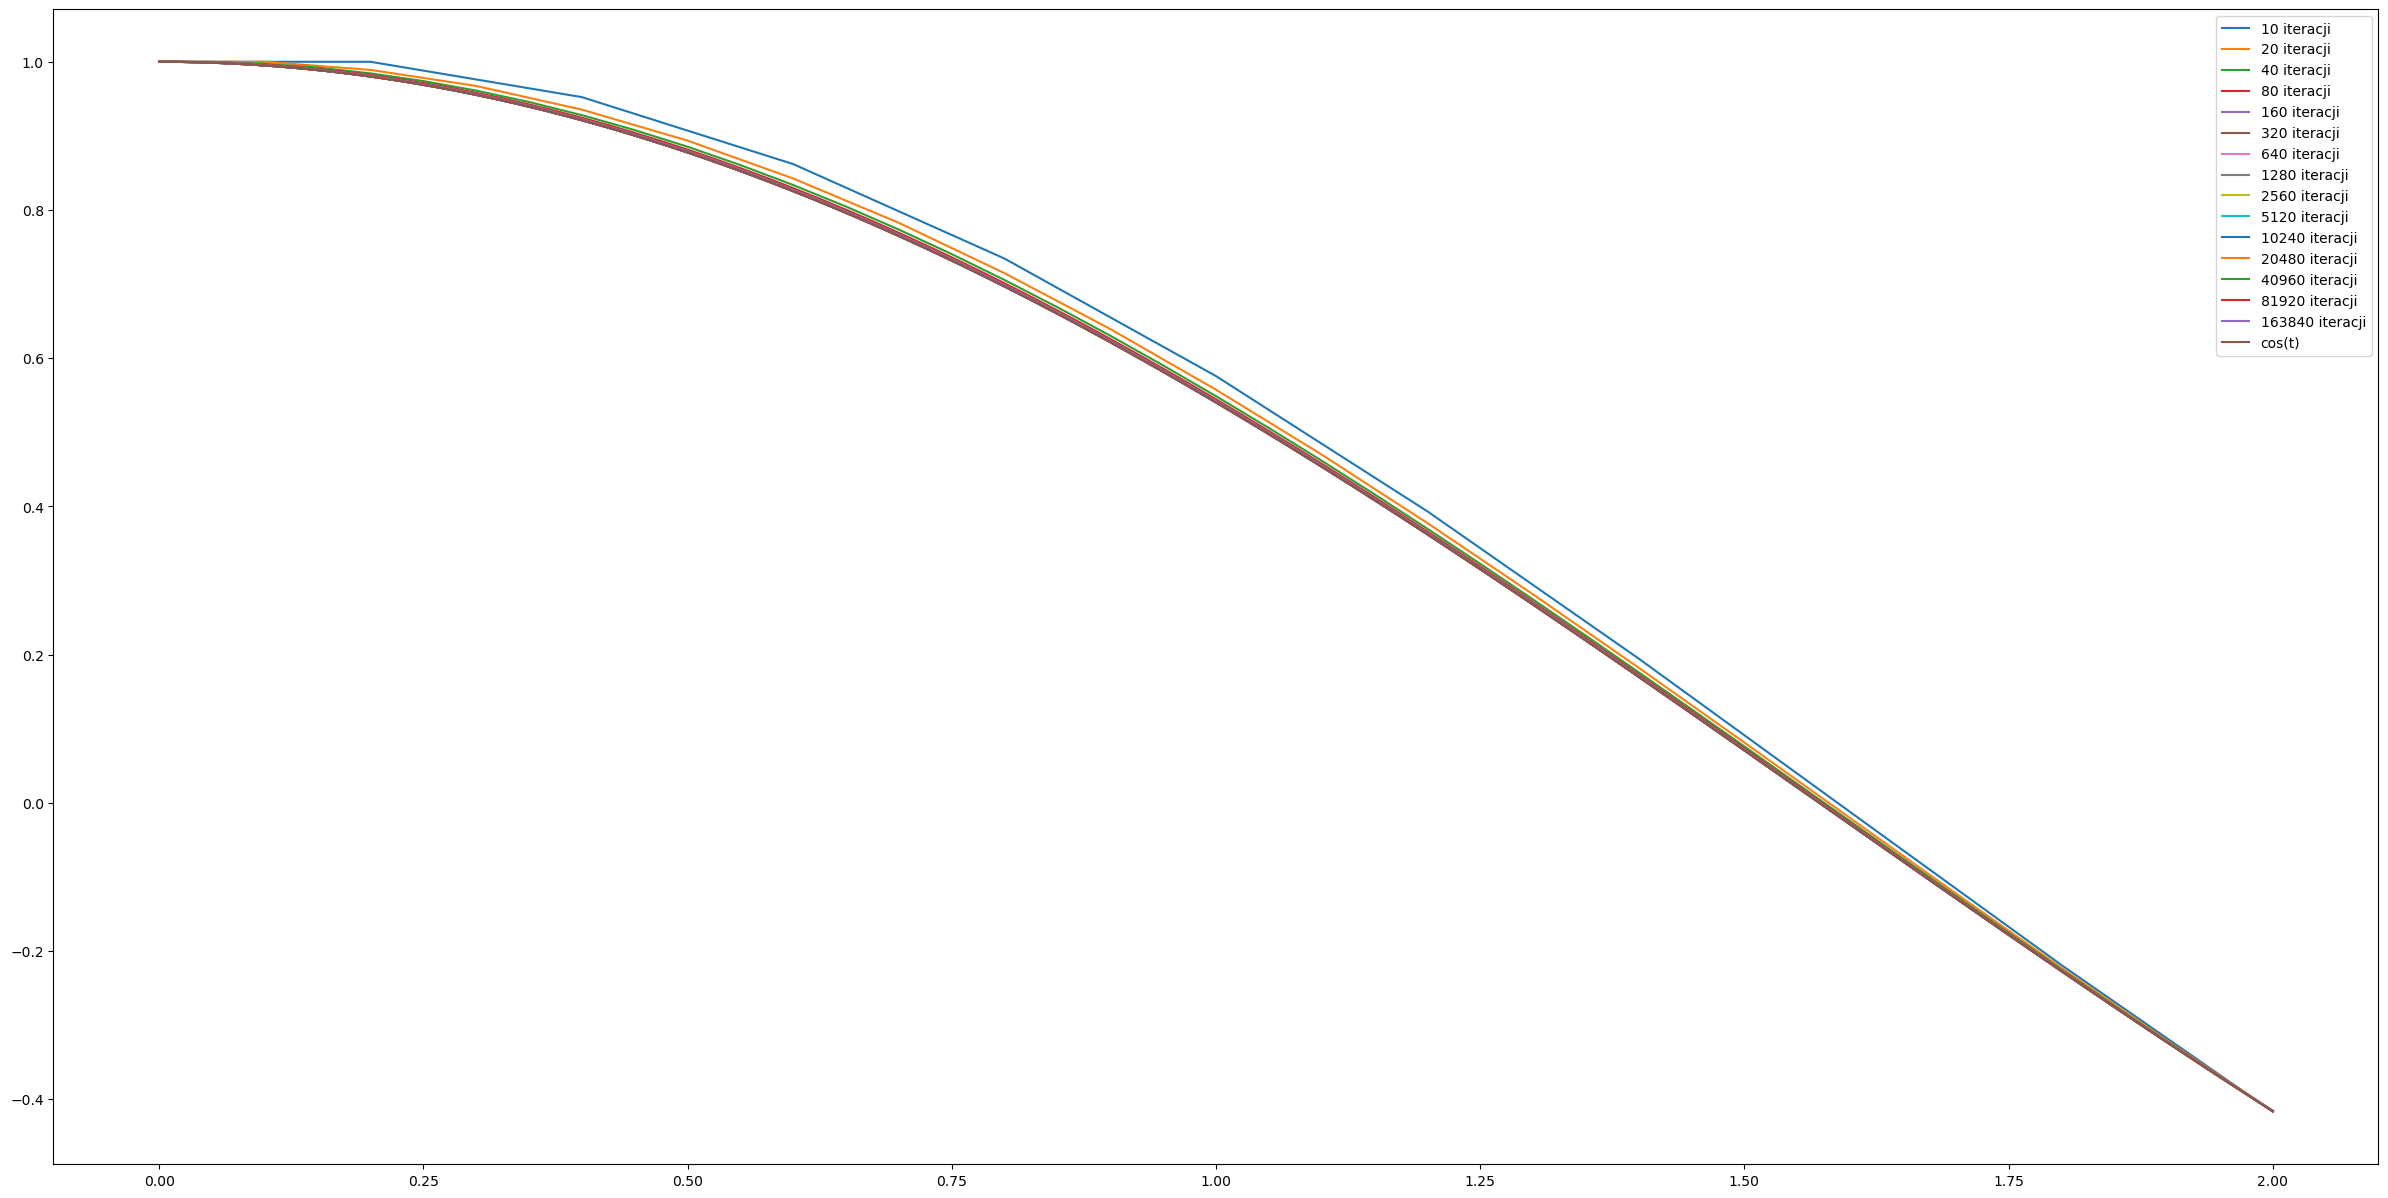

In [7]:
def x_prim(x, t, lam):
    return lam*(x-np.cos(t)) - np.sin(t)
T_0 = 0.0
KSI = 1.0
T = 2.0
X_0 = 1.0
LAM = -2.0
 
x = np.linspace(0,2,1000)
y = np.cos(x)
results = {"N": [], "h":[], "err(N) = |x_N - cos(2)|":[], 'errmax':[], 'P_Num':[]}
 
 
lambda_vals = [-2,-10,-50, -100,-1000]
N = 5
plt.figure(figsize=(30,15))
prev_error = None
for _ in range(1,16):
    N = N *2
    h = (T- T_0)/N
    wezly = np.linspace(T_0, T, N+1)
    rozwiazania = np.zeros(N+1)
    blad_punkty = np.zeros(N+1)
    for i, wezel in enumerate(wezly):
        if i==0:
            rozwiazania[i] = X_0
            continue
        rozwiazania[i] = rozwiazania[i-1]+ h*x_prim(rozwiazania[i-1], wezly[i-1], LAM)
        blad_punkty[i] = np.abs(rozwiazania[i] - np.cos(wezel))
    blad_end = np.abs(np.cos(T) - rozwiazania[-1])
    blad_max = np.max(blad_punkty)
    if prev_error is not None:
        p_num = np.log2(prev_error/blad_end)
    else:
        p_num = float('nan')
    prev_error = blad_end
    results["err(N) = |x_N - cos(2)|"].append(blad_end)
    results["errmax"].append(blad_max)
    results["P_Num"].append(p_num)
    results["N"].append(N)
    results["h"].append(h)
    plt.plot(wezly, rozwiazania, label = f"{N} iteracji")
plt.plot(x,y, label = 'cos(t)')
plt.legend() 
 
results = pd.DataFrame(results)
results = results[['N', 'h', 'err(N) = |x_N - cos(2)|', 'errmax', 'P_Num']]
res = results.copy()
for col in ['h','err(N) = |x_N - cos(2)|', 'errmax', 'P_Num']:
    results[col] = results[col].apply(scientific_format)
print(tabulate(results, headers='keys', tablefmt='grid', numalign='center', stralign='center', showindex = False))


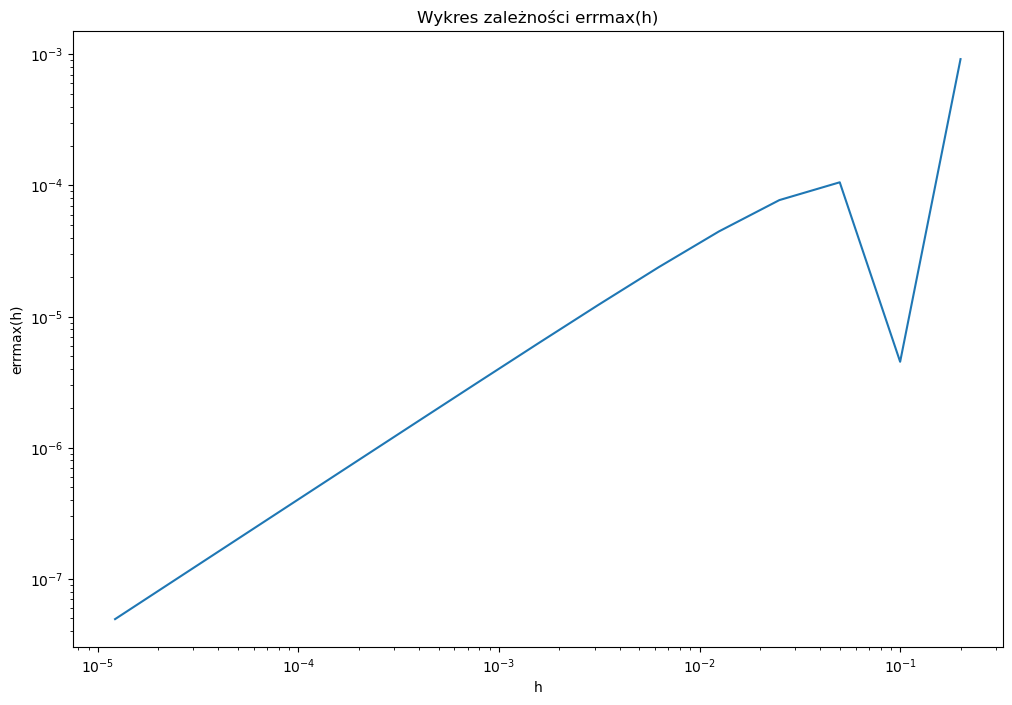

In [21]:
plt.figure(figsize=(12,8))
plt.plot(res['h'], res['err(N) = |x_N - cos(2)|'])
plt.yscale('log')
plt.xscale('log')
plt.title("Wykres zależności errmax(h)")
plt.xlabel('h')
plt.ylabel('errmax(h)')
plt.show()

+------+--------------+--------------------------+--------------+--------------+
|  N   |      h       |  err(N) = |Y_N - Y_ref|  |    err y₁    |    err y₂    |
+======+==============+==========================+==============+==============+
|  20  | 2.63 x 10^-2 |       4.84 x 10^-2       | 3.10 x 10^-2 | 3.72 x 10^-2 |
+------+--------------+--------------------------+--------------+--------------+
|  40  | 1.34 x 10^-2 |       2.55 x 10^-2       | 1.61 x 10^-2 | 1.98 x 10^-2 |
+------+--------------+--------------------------+--------------+--------------+
|  80  | 6.81 x 10^-3 |       1.32 x 10^-2       | 8.24 x 10^-3 | 1.03 x 10^-2 |
+------+--------------+--------------------------+--------------+--------------+
| 160  | 3.42 x 10^-3 |       6.72 x 10^-3       | 4.16 x 10^-3 | 5.27 x 10^-3 |
+------+--------------+--------------------------+--------------+--------------+
| 320  | 1.72 x 10^-3 |       3.43 x 10^-3       | 2.09 x 10^-3 | 2.72 x 10^-3 |
+------+--------------+-----

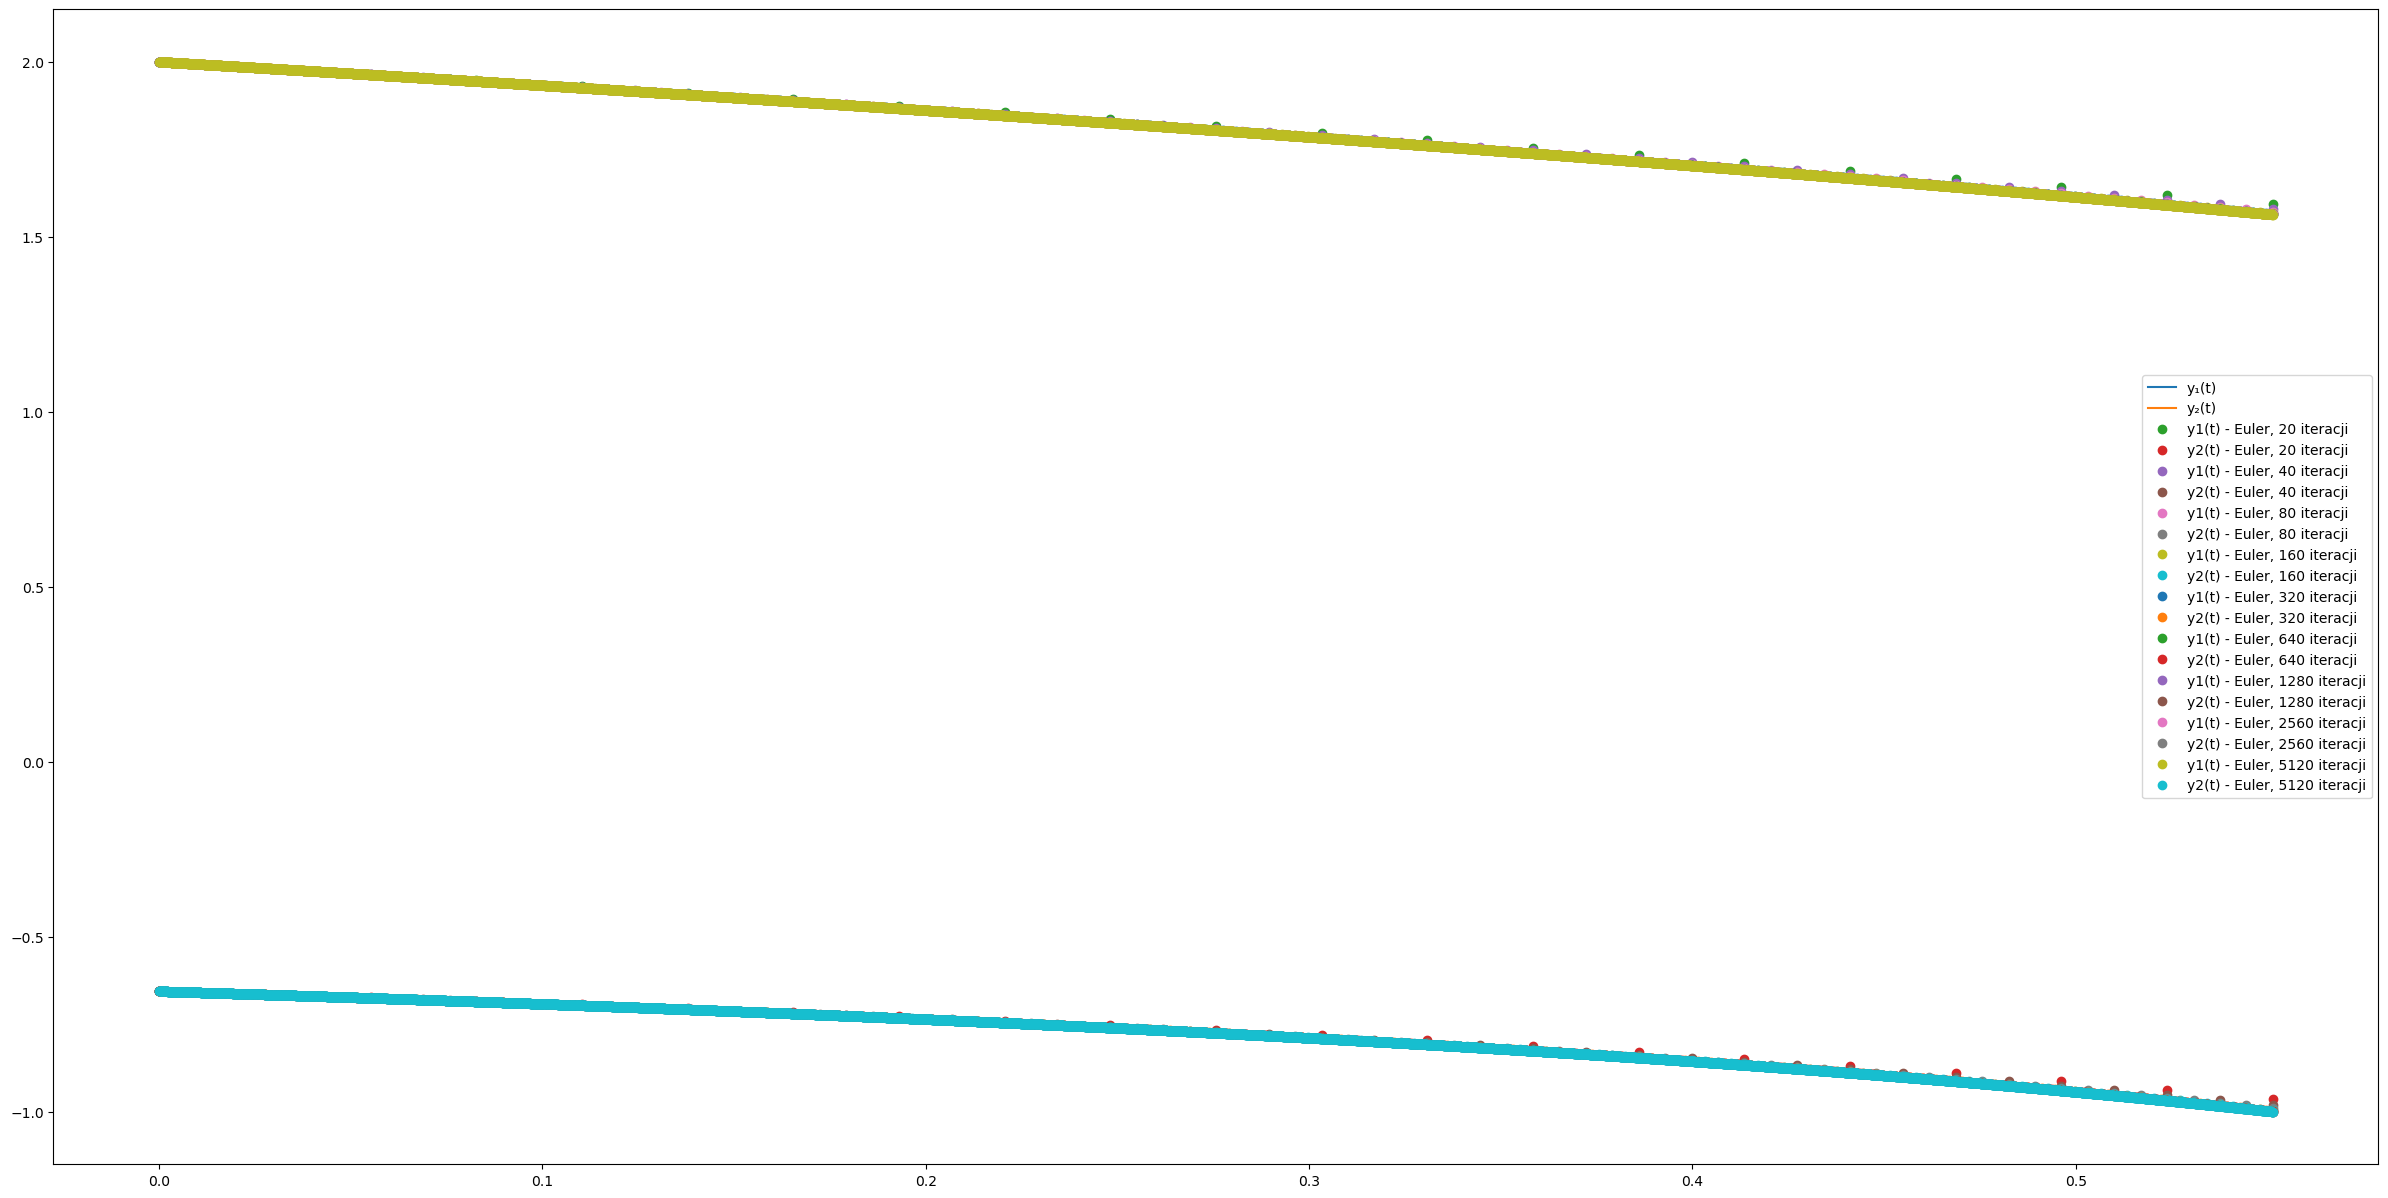

In [8]:
def van_der_pol_prim(y, t, epsilon):
    y1, y2 = y
    dy1_dt = y2
    dy2_dt = (((1 - y1**2) * y2 - y1)) / epsilon
    return np.array([dy1_dt, dy2_dt])
T_0 = 0.0
T = 0.55139  
epsilon = 1e-1  
y1_0 = 2.0
y2_0 = -2/3 + 10/81*epsilon - 292/2187*epsilon**2 -1814/19683 *  epsilon**3
Y_0 = np.array([y1_0, y2_0])


sol_ref = solve_ivp(lambda t, y: van_der_pol_prim(y, t, epsilon), 
                   [T_0, T], Y_0)
y_ref = sol_ref.y[:, -1]  
results = {
    "N": [], 
    "h": [], 
    "err(N) = |Y_N - Y_ref|": [],
    "err y₁": [],
    "err y₂": []
}
plt.figure(figsize=(30, 15))
def euler_fixed_step(N):
    h = (T - T_0) / (N + 1)
    wezly = np.linspace(T_0, T, N+1)
    rozwiazania = np.zeros((2, N+1))
    rozwiazania[:, 0] = Y_0
    
    for i in range(1, N+1):
        rozwiazania[:, i] = rozwiazania[:, i-1] + h * van_der_pol_prim(rozwiazania[:, i-1], wezly[i-1], epsilon)
    plt.plot(wezly, rozwiazania[0], 'o', label=f"y1(t) - Euler, {N} iteracji")
    plt.plot(wezly, rozwiazania[1], 'o', label=f"y2(t) - Euler, {N} iteracji")
    plt.legend()
    
    return rozwiazania, h
plt.plot(sol_ref.t, sol_ref.y[0], label='y₁(t)')
plt.plot(sol_ref.t, sol_ref.y[1], label='y₂(t)')
N = 10
for i in range(1, 10):
    N = N * 2  
    rozwiazania, h = euler_fixed_step(N)
    
    blad_y1 = abs(rozwiazania[0, -1] - y_ref[0])
    blad_y2 = abs(rozwiazania[1, -1] - y_ref[1])
    blad_norm = np.linalg.norm([blad_y1, blad_y2])
    
    results["N"].append(N)
    results["h"].append(h) 
    results["err(N) = |Y_N - Y_ref|"].append(blad_norm)
    results["err y₁"].append(blad_y1)
    results["err y₂"].append(blad_y2)
results_df = pd.DataFrame(results)
for col in ['h', 'err(N) = |Y_N - Y_ref|', 'err y₁', 'err y₂']:
    results_df[col] = results_df[col].apply(scientific_format)

print(tabulate(results_df, headers='keys', tablefmt='grid', 
               numalign='center', stralign='center', showindex=False))

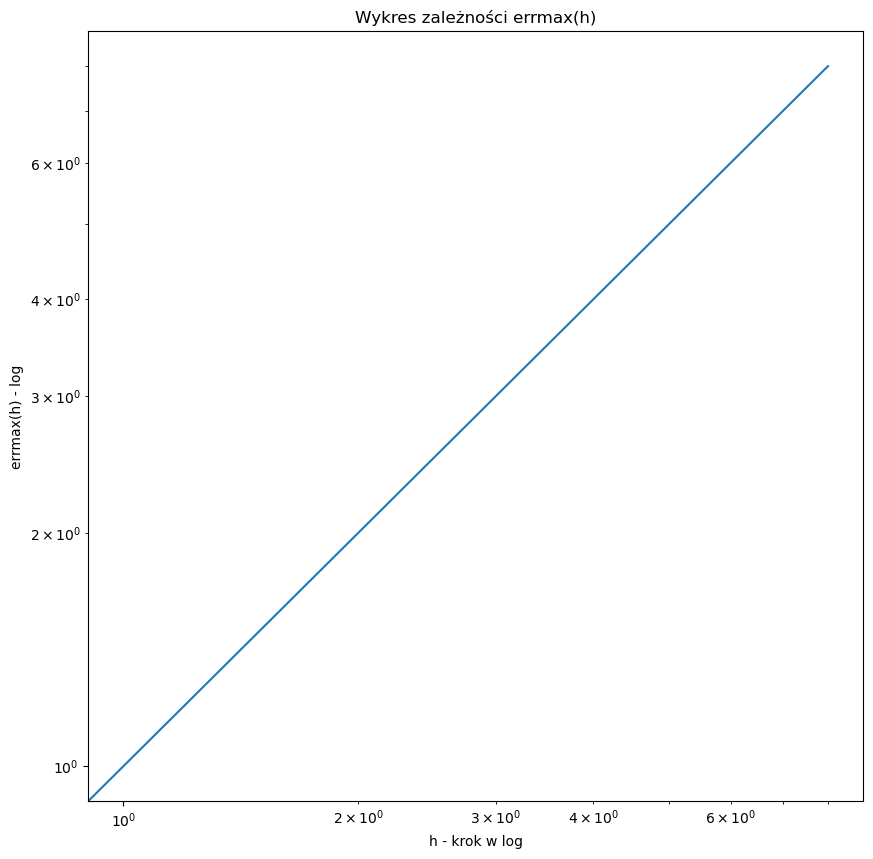

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(results_df['h'], results_df['err'])
plt.yscale('log')
plt.xscale('log')
plt.title("Wykres zależności errmax(h)")
plt.xlabel('h - krok w log')
plt.ylabel('errmax(h) - log')
plt.show()